In [1]:
%%html
<style>
.prompt {
    visibility: hidden;
}

section:nth-child(2) .fragment:nth-child(2) .inner_cell, .cell:nth-child(3) .inner_cell    
{
    display: none !important;
}

body > div > div > section section .input
{
    display: none !important
}

body > div > div > section:nth-child(2) .fragment:nth-child(2), .cell:nth-child(3)
{
    margin-top: -100px;
    margin-right: -200px;
    -moz-transform: scaleX(-1);
    -o-transform: scaleX(-1);
    -webkit-transform: scaleX(-1);
    transform: scaleX(-1);
    filter: FlipH;
    -ms-filter: "FlipH";
}
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    margin-left: -100px;
}
video {
    max-height: 700px !important;
}
</style>

# Intro to Machine Learning
## by Bowei Yao & Ramsey D'silva
## Mackenzie Investments

In [2]:
from IPython.display import HTML
HTML('<img src="gifs/bear.gif">')

## How to spot a bear in the wilds?

In [3]:
import warnings
import os

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.core.display import Image, HTML, display

from helpers import get_image, get_images, get_pca
from plot import plot2D, plot3D, animate2D, plot_decision_regions, plot_image, \
                 plot_text, plot_dial, draw_nn_prediction, plot_correlation_graphs
import neural_network as nn

warnings.simplefilter(action='ignore', category=RuntimeWarning)

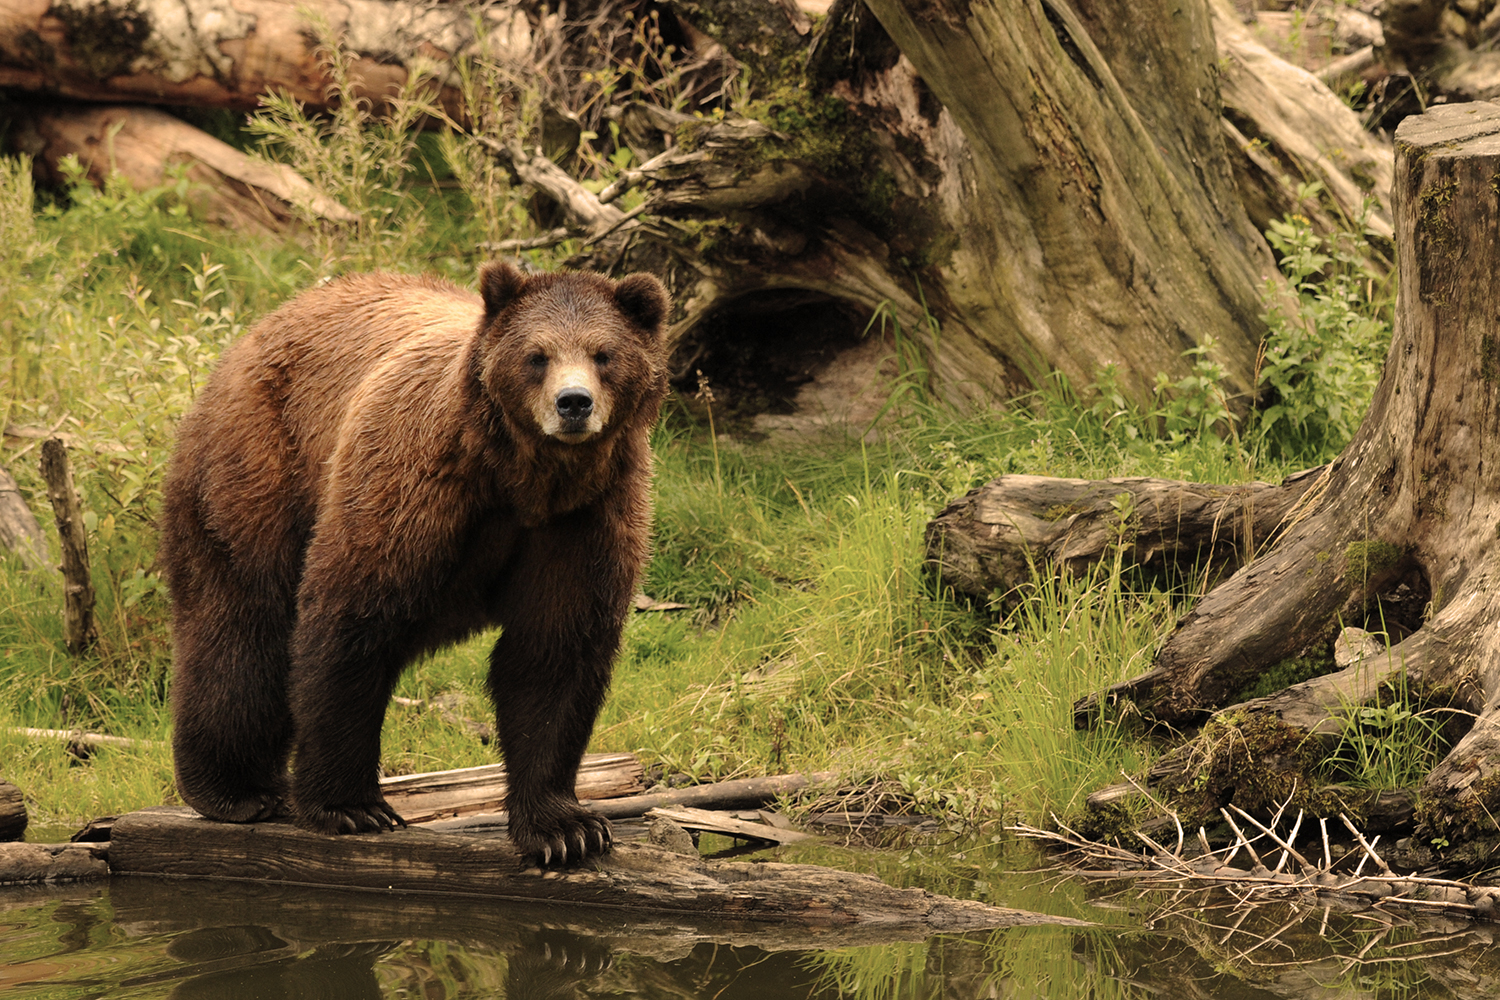

In [4]:
Image(filename='images/bear.jpg', width=500)


* Machine Learning is the field of programming that tries to make computers mimic human's range of learning, reasoning and decision making
* How would you spot a bear if you saw one in the woods?
* What are the features you would look for?
* What features would you select?

## Feature engineering

In [5]:
df = pd.DataFrame(
    columns=['Image', 'Number of legs', 'Bear?'],
    data=[[get_image('bear'), 4, 'Yes']],
    index=['Grizzly bear'])
HTML(df.to_html(escape=False))

## But table has 4 legs too

In [6]:
df = df.append(pd.Series([get_image('table'), 4, 'No'], index=df.columns, name='Table'))
HTML(df.to_html(escape=False))

## Add number of eyes to distinguish

In [7]:
df.insert(2, 'Number of eyes', [2, 0])
HTML(df.to_html(escape=False))

## Add weight for further distinction

In [8]:
df.insert(3, 'Weight (kg)', [300, 5])
HTML(df.to_html(escape=False))

## But zebra has 2 eyes, 4 legs and weighs as much as a bear

In [9]:
df = df.append(pd.Series([get_image('zebra'), 4, 2, 300, 'No'], index=df.columns, name='Zebra'))
HTML(df.to_html(escape=False))

## Add color for further distinction

In [10]:
df.insert(4, 'Color', ['Brown', 'Brown', 'B&W'])
HTML(df.to_html(escape=False))

## Walrus shares similar specs as a bear

In [11]:
df = df.append(pd.Series([get_image('walrus'), 4, 2, 350, 'Brown', 'No'], index=df.columns, name='Walrus'))
HTML(df.to_html(escape=False))

## ... And there are other types of bears

In [12]:
df = df.append(pd.Series([get_image('panda'), 4, 2, 100, 'B&W', 'Yes'], index=df.columns, name='Panda'))
df = df.append(pd.Series([get_image('polar_bear'), 4, 2, 300, 'White', 'Yes'], index=df.columns, name='Polar bear'))
temp = df.iloc[[0, 2, 3, 4, 5], :]
HTML(temp.to_html(escape=False))

## Add texture and sound to identify common traits

In [13]:
df.insert(5, 'Texture', ['Long fur', 'Wood', 'Short fur', 'Leather', 'Long fur', 'Long fur'])
df.insert(6, 'Sound', ['Roar', 'None', 'Grunt', 'Moan', 'Roar', 'Roar'])
HTML(df.to_html(escape=False))

## ... But tiger and lion are also similar

In [14]:
df = df.append(pd.Series([get_image('tiger'), 4, 2, 300, 'Light brown', 'Short fur', 'Roar', 'No'], index=df.columns, name='Tiger'))
df = df.append(pd.Series([get_image('lion'), 4, 2, 200, 'Striped', 'Short fur', 'Roar', 'No'], index=df.columns, name='Lion'))
temp = df.iloc[[0, 4, 5, 6, 7], :]
HTML(temp.to_html(escape=False))

## Add lifepan and claw length for further distinction

In [15]:
df.insert(7, 'Lifespan', [25, 0, 30, 30, 20, 20, 22, 12])
df.insert(8, 'Claw length (cm)', [15, 0, 0, 0, 10, 20, 5, 5])
temp = df.iloc[[0, 4, 5, 6, 7], :]
HTML(temp.to_html(escape=False))

## Next step in feature engineering

* Choose independent features
* Convert non numerical features to numeric value
* Normalize values

## Drop redundant data

In [16]:
df = df.drop(['Number of legs', 'Number of eyes'], axis=1)
temp = df.iloc[[0, 1, 3, 4, 5, 7], :]
HTML(temp.to_html(escape=False))

## Convert data to numerical format

In [17]:
df = df.rename(columns={'Texture': 'Fur length (cm)', 'Sound': 'Loudness (db)', 'Color': 'Pixel intensity'})
df['Pixel intensity'] = [190, 220, 140, 150, 200, 40, 150, 120]
df['Fur length (cm)'] = [17, 0, 5, 0, 13, 16, 6, 4]
df['Loudness (db)'] = [120, 0, 30, 50, 70, 130, 90, 100]
df['Bear?'] = [1, 0, 0, 0, 1, 1, 0, 0]
temp = df.iloc[[0, 1, 3, 4, 5, 7], :]
HTML(temp.to_html(escape=False))

## Add more data!

* Allows model to generalize better
* Removes bias that are inherent in small datasets

### Both positive

In [18]:
df = df.append(pd.Series([get_image('babybear'), 100, 165, 13, 100, 23, 9, 1], index=df.columns, name='Baby bear'))
df = df.append(pd.Series([get_image('blackbear'), 220, 235, 15, 90, 17, 10, 1], index=df.columns, name='Black bear'))
df = df.append(pd.Series([get_image('mamabear'), 320, 190, 18, 120, 27, 15, 1], index=df.columns, name='Mother bear'))
df = df.append(pd.Series([get_image('papabear'), 350, 215, 19, 120, 22, 16, 1], index=df.columns, name='Father bear'))
temp = df.iloc[[0, 8, 9, 10, 11], :]
HTML(temp.to_html(escape=False))

### And negative

In [19]:
df = df.append(pd.Series([get_image('monkey'), 40, 165, 4, 60, 18, 3, 0], index=df.columns, name='Monkey'))
df = df.append(pd.Series([get_image('goose'), 10, 125, 0, 65, 16, 0, 0], index=df.columns, name='Goose'))
df = df.append(pd.Series([get_image('duck'), 5, 140, 0, 45, 7, 0, 0], index=df.columns, name='Duck'))
df = df.append(pd.Series([get_image('fox'), 30, 160, 5, 45, 4, 3, 0], index=df.columns, name='Fox'))
df = df.append(pd.Series([get_image('moose'), 500, 170, 3, 55, 20, 0, 0], index=df.columns, name='Moose'))
temp = df.iloc[[0, 12, 13, 14, 15, 16], :]
HTML(temp.to_html(escape=False))

### Visualizing correlations

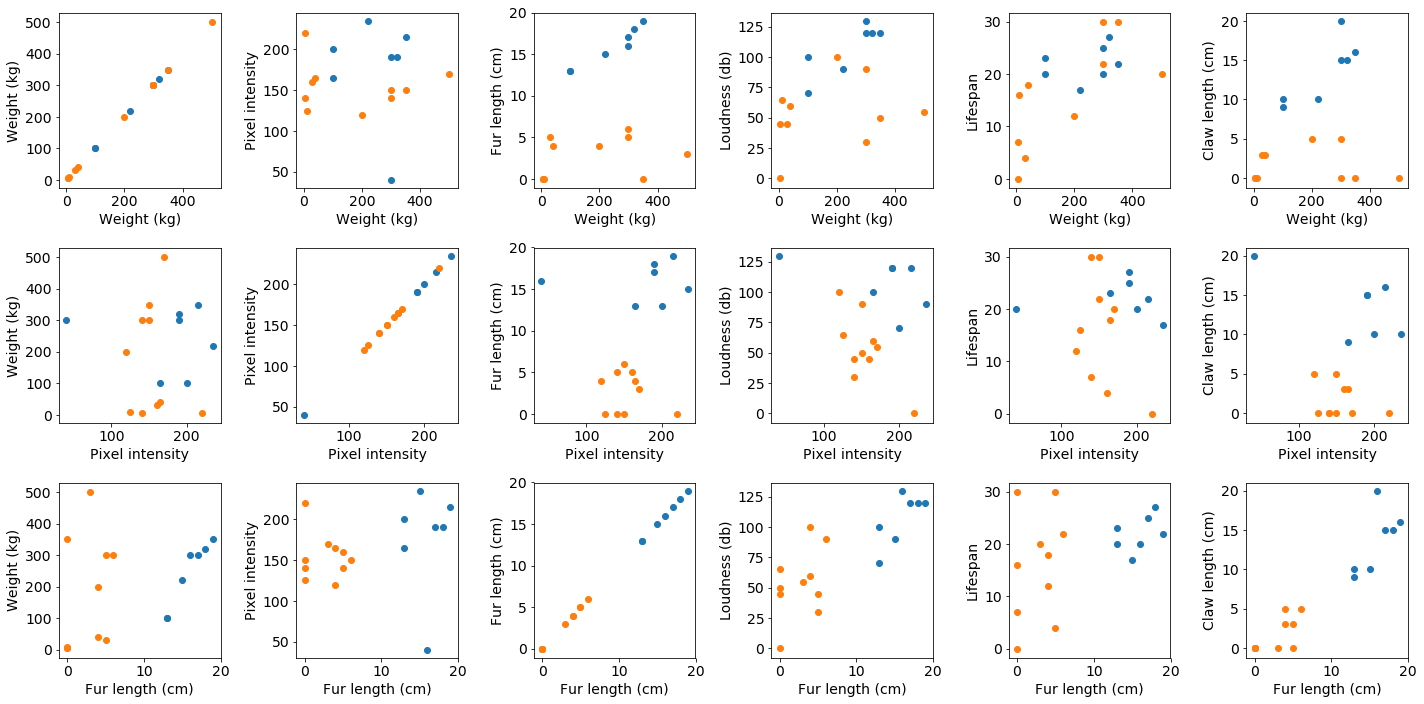

In [20]:
# change font size
matplotlib.rcParams.update({'font.size': 14})

columns = list(df.columns[i] for i in range(1, 7))
yes = df['Bear?'] == 1
dfs = [df[yes], df[~yes]]

plot_correlation_graphs(df[columns], df[columns[:3]], dfs, figsize=(20, 10))

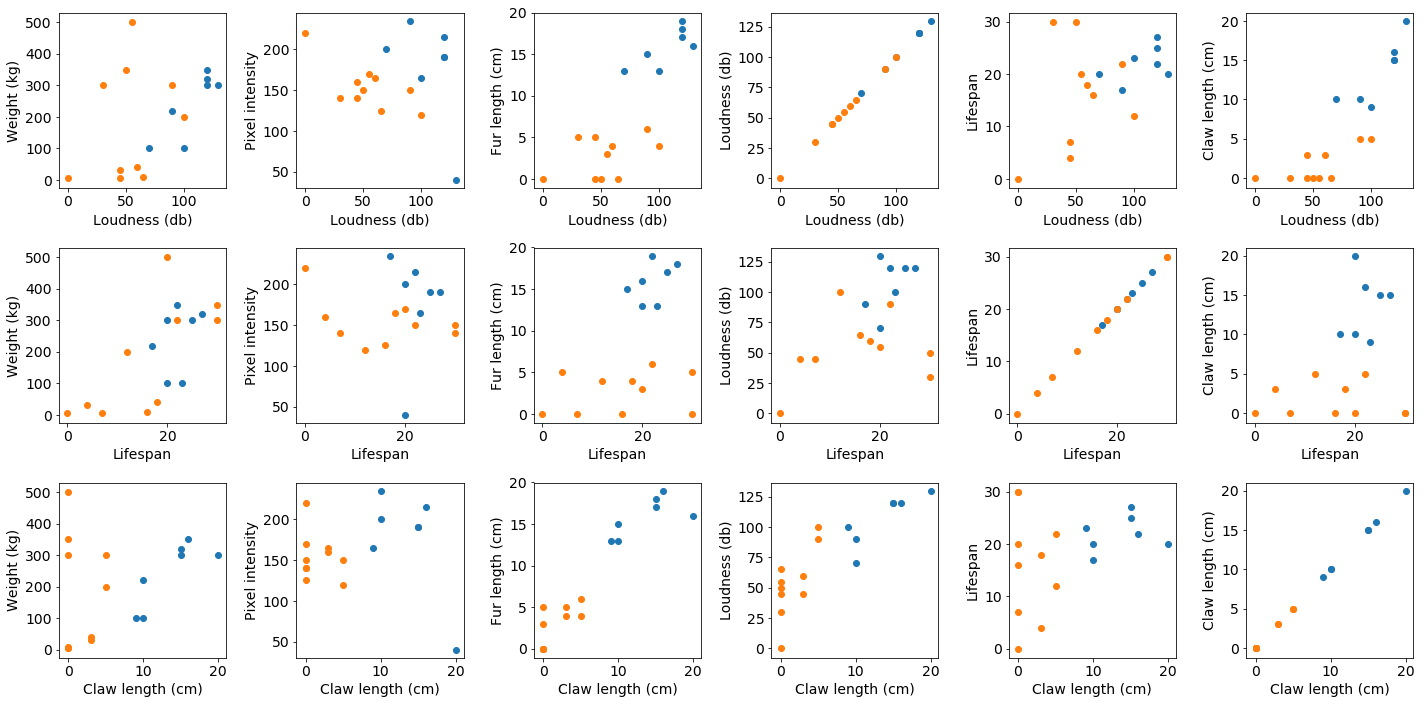

In [21]:
plot_correlation_graphs(df[columns], df[columns[3:]], dfs, figsize=(20, 10))

### Prinicipal Components

* Difficult for us to visualize/analyze data in multiple dimensions
* Collapses multi-dimensions into projection into n axes that preserve the most variation in the data

### PCA in 2 dimensions

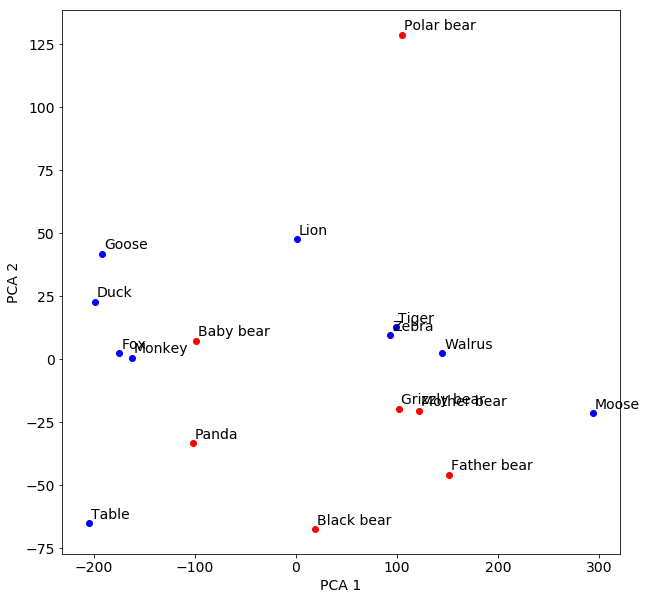

In [22]:
df_pca2d = get_pca(2, df[columns])
df_pca2d['Bear?'] = df['Bear?']
yes = df_pca2d['Bear?'] == 1
plot2D(*(df_pca2d[yes], df_pca2d[~yes]), columns=[df_pca2d.columns[i] for i in [0, 1]], figsize=(10, 10), plot_titles=True)

### PCA in 3 dimensions

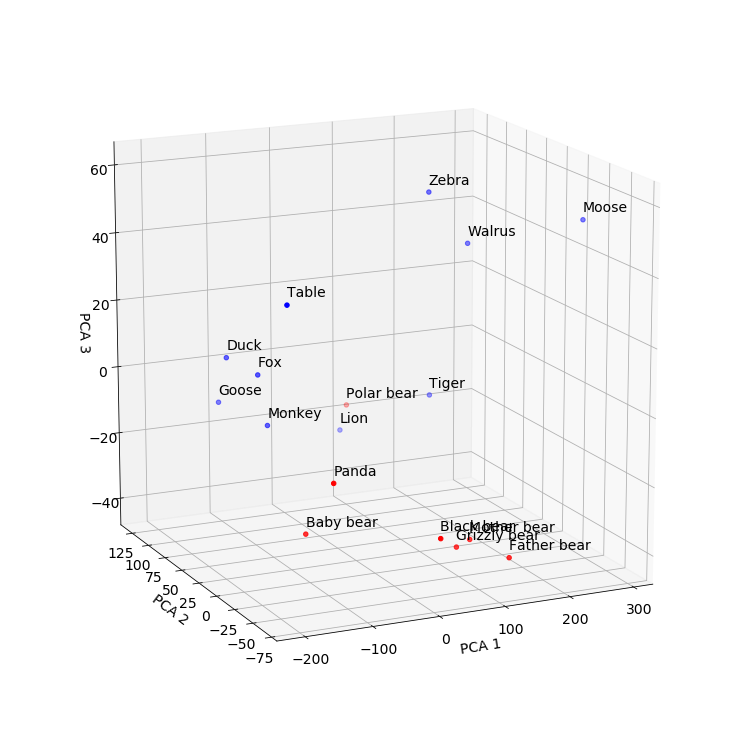

In [23]:
df_pca3d = get_pca(3, df[columns])
df_pca3d['Bear?'] = df['Bear?']
yes = df_pca3d['Bear?'] == 1
plot3D(*(df_pca3d[yes], df_pca3d[~yes]), columns=[df_pca3d.columns[i] for i in [0, 1, 2]], figsize=(10, 10), plot_titles=True)

# restore font size
matplotlib.rcParams.update({'font.size': 12})

## Support Vector Machine (SVM)
* SVM defines the hyperplane of separation between different data sets
* Prediction is done through position of data within these hyperplanes

In [24]:
df_pca2d[yes].reset_index(drop=True)
df_no = df_pca2d[~yes].reset_index(drop=True)
df_yes = df_pca2d[yes].reset_index(drop=True)
df_zipped = pd.concat([df_yes, df_no]).sort_index()
anim = animate2D(df_zipped, figsize=(10, 10), factor=100.0)
HTML(anim.to_html5_video())

# Data Science vs Machine Learning

## Traditional techniques
* Manually program the equations, algorithms
* Manually program the features, ratios etc.
* Not scalable
* Hard, non-intuitive, not how humans think
* Widely in use by quants
* Rule-based

## New techniques
* Highly scalable
* Does not involve algorithms or equations for features
* Manually program the structure of the network
* Model is based on how humans think and perform logic reasoning
* Not rule-based

## Neural Networks
* models mental or behavioral phenomena
* various types of neural networks, including memory and attention span
* able to perform tasks that are often found difficult to express using traditional computer algorithm

### Biological Neuron

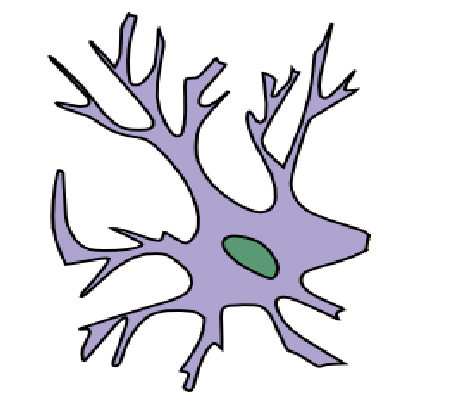

In [25]:
neuron = os.path.join(os.getcwd(), 'neuron_imgs/neuron.png')
plt.close()
fig, ax = plt.subplots(figsize=(7, 7))
plot_image(ax, neuron)
plt.show()                    

### Biological Neural Network

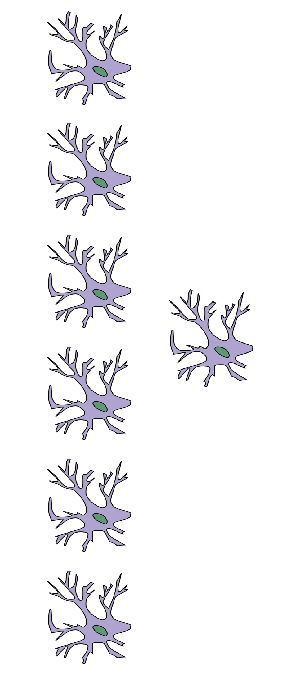

In [26]:
plt.close()

fig, ax = plt.subplots(6, 2, figsize=(4, 12))

for i in range(6):
    plot_image(ax[i, 0], neuron)

ax = plt.subplot2grid((6, 2), (0, 1), rowspan=6)
extent = [-2, 2, -0.3, 0.3]
plot_image(ax, neuron, extent=extent, size=2)


plt.show()


### Artificial Neural Network

In [27]:
SEED = 20170914
ITERATION_COUNT = 1500
DELTA = 0.001
training_input = (df.iloc[:, 1:7].transform(lambda x: x / 100.0)).values
training_output = df.iloc[:, 7].values
my_nn = nn.NeuralNetwork(6, 1, SEED)

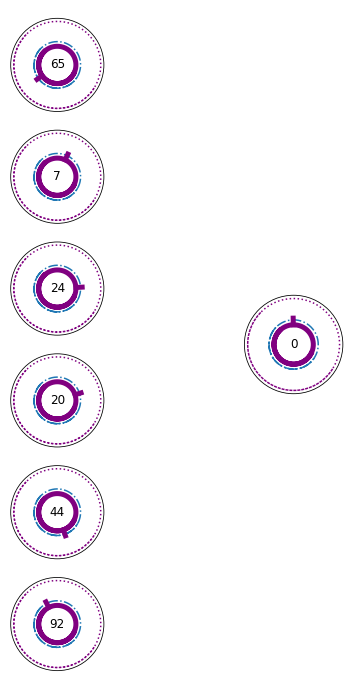

In [28]:
plt.close()

fig, ax = plt.subplots(6, 3, figsize=(6, 12), subplot_kw=dict(projection='polar'))

for i in range(6):
    ax1, ax2 = ax[i, :2]
    plot_dial(ax1, my_nn.synaptic_weights[i])
    ax2.axis('off')

ax = plt.subplot2grid((6, 3), (0, 2), rowspan=6, projection='polar')

plot_dial(ax, 0)
    
plt.show()

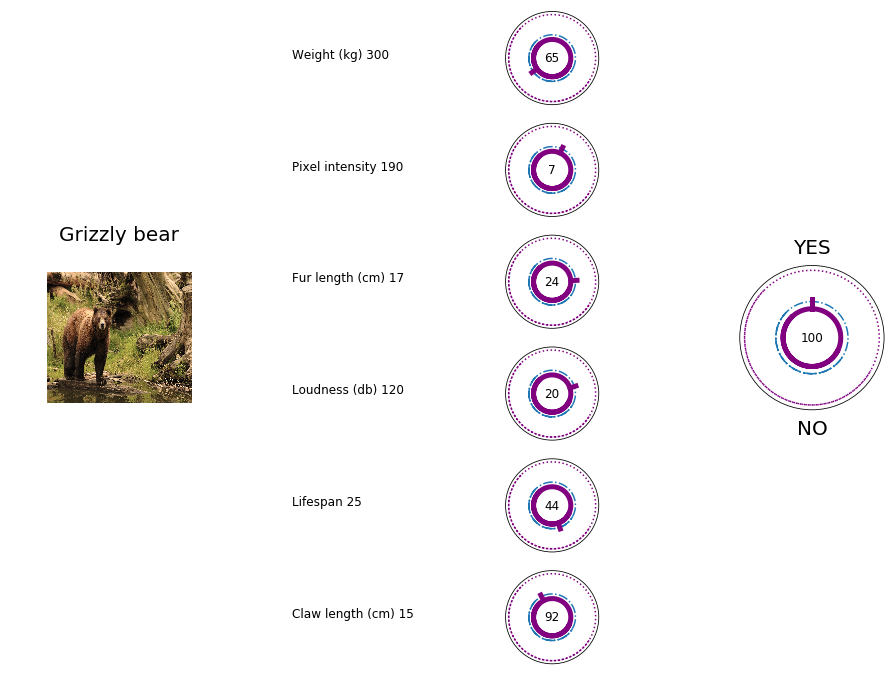

In [29]:
row = 0
prediction = my_nn.predict(df.iloc[row, 1:-1].tolist())
draw_nn_prediction(row, df, my_nn.synaptic_weights, prediction)

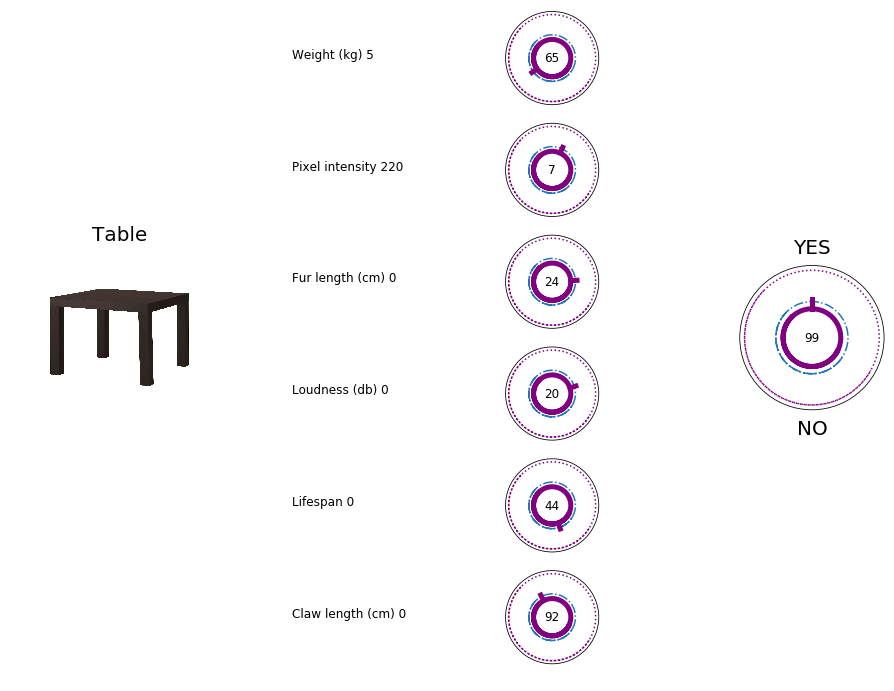

In [30]:
row = 1
prediction = my_nn.predict(df.iloc[row, 1:-1].tolist())
draw_nn_prediction(row, df, my_nn.synaptic_weights, prediction)

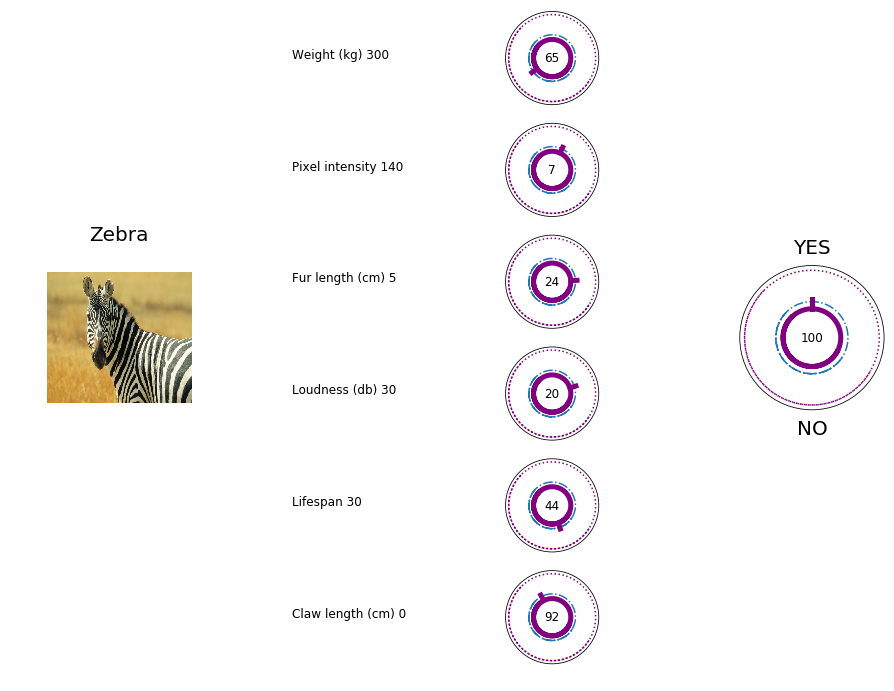

In [31]:
row = 2
prediction = my_nn.predict(df.iloc[row, 1:-1].tolist())
draw_nn_prediction(row, df, my_nn.synaptic_weights, prediction)

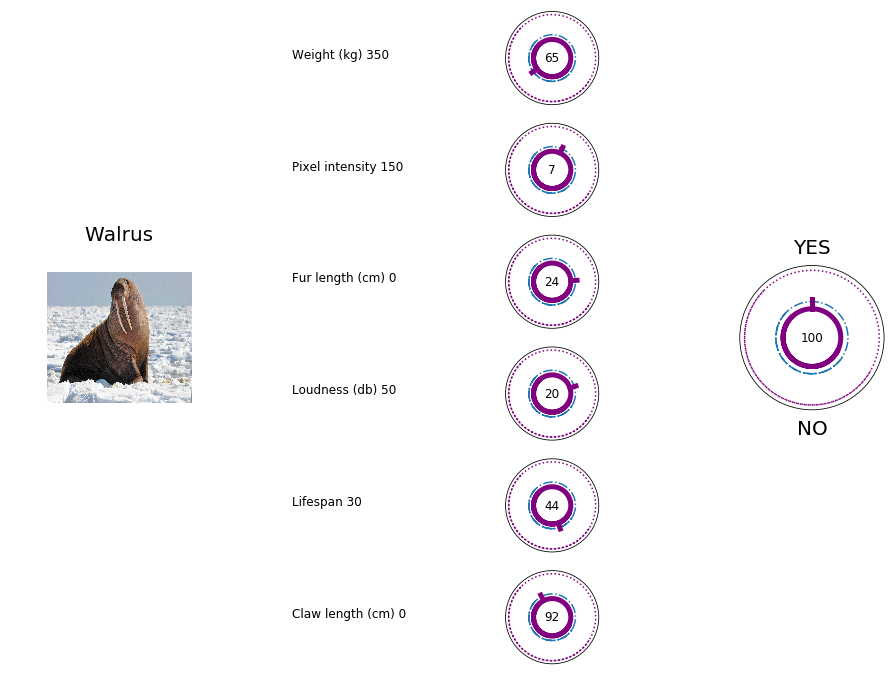

In [32]:
row = 3
prediction = my_nn.predict(df.iloc[row, 1:-1].tolist())
draw_nn_prediction(row, df, my_nn.synaptic_weights, prediction)

## Training our Neural Network

In [33]:
import matplotlib.animation as animation
import matplotlib.image as mimage

ITERATION_COUNT = 1500
my_nn.generate_random_weights()
errors, weights = my_nn.train(np.array(training_input), np.array([training_output]).T, ITERATION_COUNT)

In [34]:
plt.close()

fig, ax = plt.subplots(6, 7, figsize=(15, 13), subplot_kw=dict(projection='polar'))

row = 0
ax1 = plt.subplot2grid((6, 7), (0, 0), rowspan=6)
image = os.path.join(os.getcwd(), df.iloc[row, 0].split('"')[1])
ax1_image = plot_image(ax1, image, extent=[-100, 100, -20, 20], size=100)
label = ax1.text(0, 30, df.iloc[row].name, ha='center', size=20)

dials = []
for i in range(6):
    ax0, ax1, ax2 = ax[i, 1:4]
    ax0.axis('off')
    dials.append(plot_dial(ax1, my_nn.synaptic_weights[i]))
    ax2.axis('off')

ax = plt.subplot2grid((6, 7), (0, 4), colspan=3, rowspan=6, projection='rectilinear')

xpoints = range(ITERATION_COUNT)
plt.xlabel('iterations (n)')
plt.ylabel('error (%)')
ax.set_xlim(0, ITERATION_COUNT)
ax.set_ylim(0, 0.6)
ax.set_aspect(2000)
plt.title('Error Curve')

step = 10
update_step = 50
t = np.arange(0, 40.5, 0.1)
images = []
for i, row in df.iterrows():
    image = os.path.join(os.getcwd(), row['Image'].split('"')[1])
    images.append(mimage.imread(image))
    
def update(i):
    x, y = xpoints[i:i+update_step+step:step], errors[i:i+update_step+step:step]
    ax.plot(x, y, color='purple')
    for a, (pointer, text) in enumerate(dials):
        weight = weights[i][a]
        pointer.set_xdata([6.3*(1-weight)]*len(t))
        pointer.set_ydata(t+20)
        text.set_text(f"{int(weight*100)}")
    
    row = i % len(df)
    ax1_image.set_data(images[row])
    label.set_text(df.iloc[row].name)

anim = animation.FuncAnimation(fig, update, np.arange(0, ITERATION_COUNT, update_step), interval=300, repeat=False)
HTML(anim.to_html5_video())

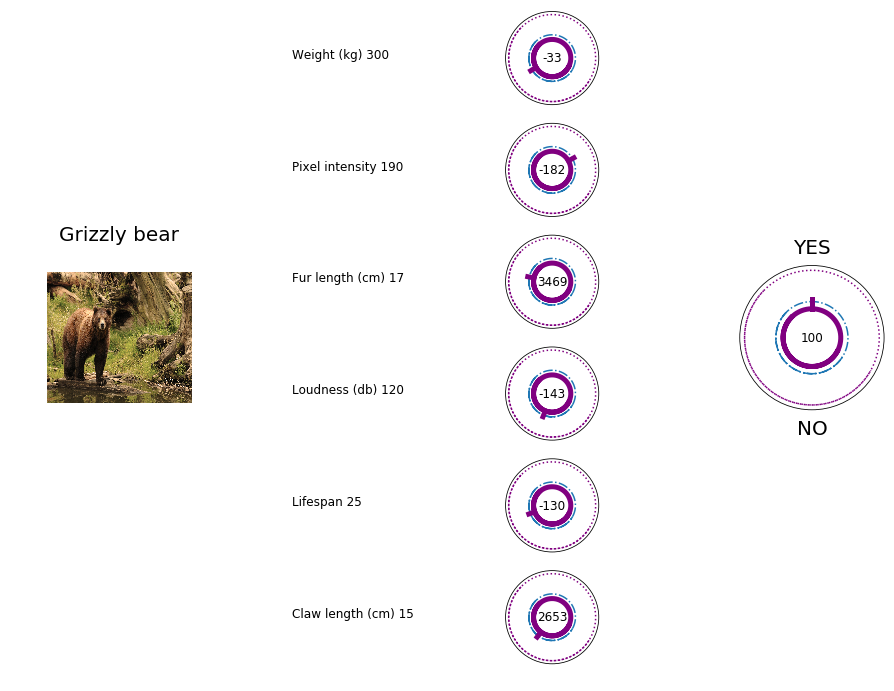

In [35]:
row = 0
prediction = my_nn.predict(df.iloc[row, 1:-1].tolist())
draw_nn_prediction(row, df, my_nn.synaptic_weights, prediction)

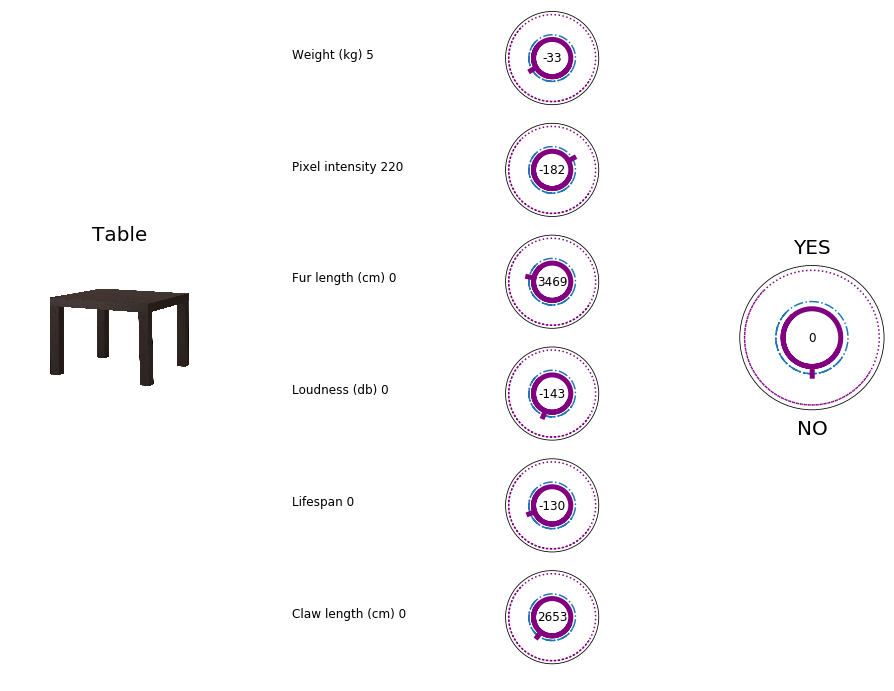

In [36]:
row = 1
prediction = my_nn.predict(df.iloc[row, 1:-1].tolist())
draw_nn_prediction(row, df, my_nn.synaptic_weights, prediction)

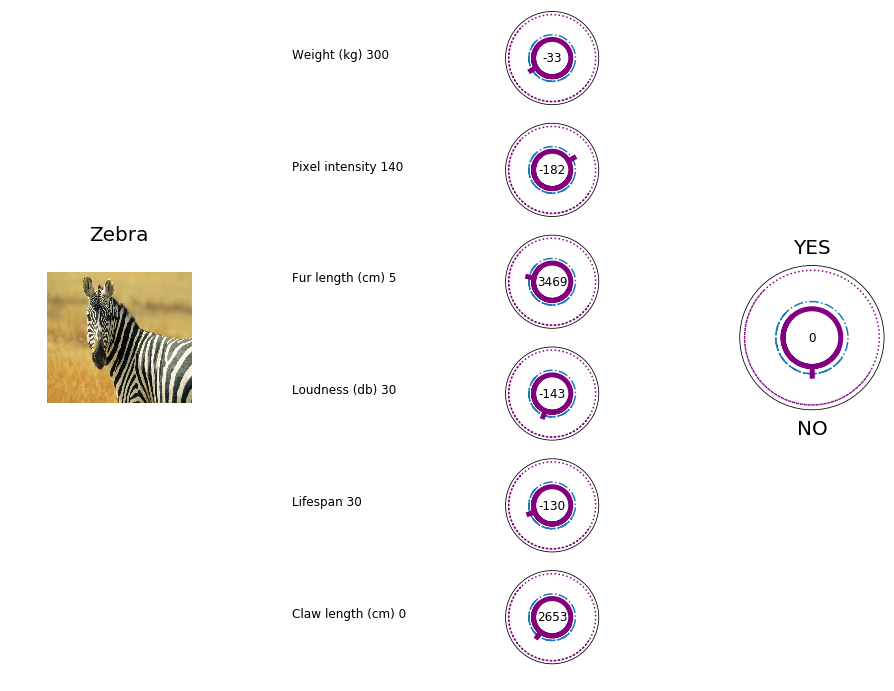

In [37]:
row = 2
prediction = my_nn.predict(df.iloc[row, 1:-1].tolist())
draw_nn_prediction(row, df, my_nn.synaptic_weights, prediction)

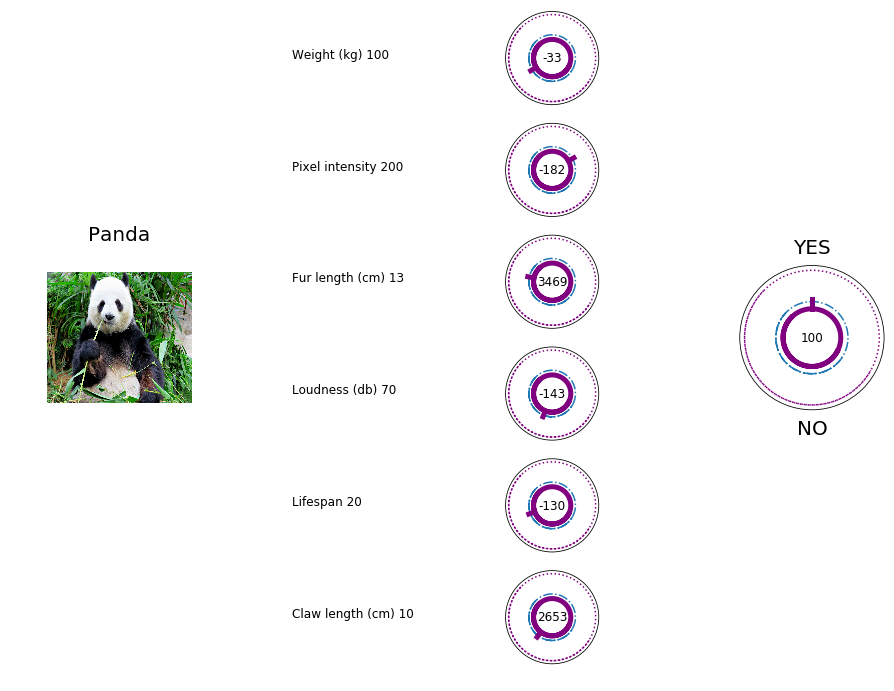

In [38]:
row = 4
prediction = my_nn.predict(df.iloc[row, 1:-1].tolist())
draw_nn_prediction(row, df, my_nn.synaptic_weights, prediction)

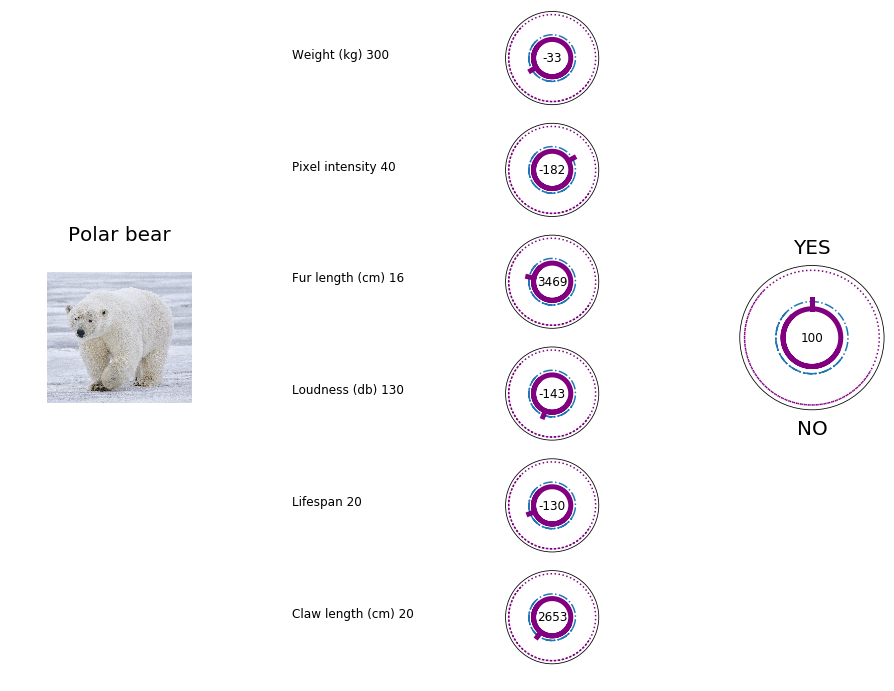

In [39]:
row = 5
prediction = my_nn.predict(df.iloc[row, 1:-1].tolist())
draw_nn_prediction(row, df, my_nn.synaptic_weights, prediction)

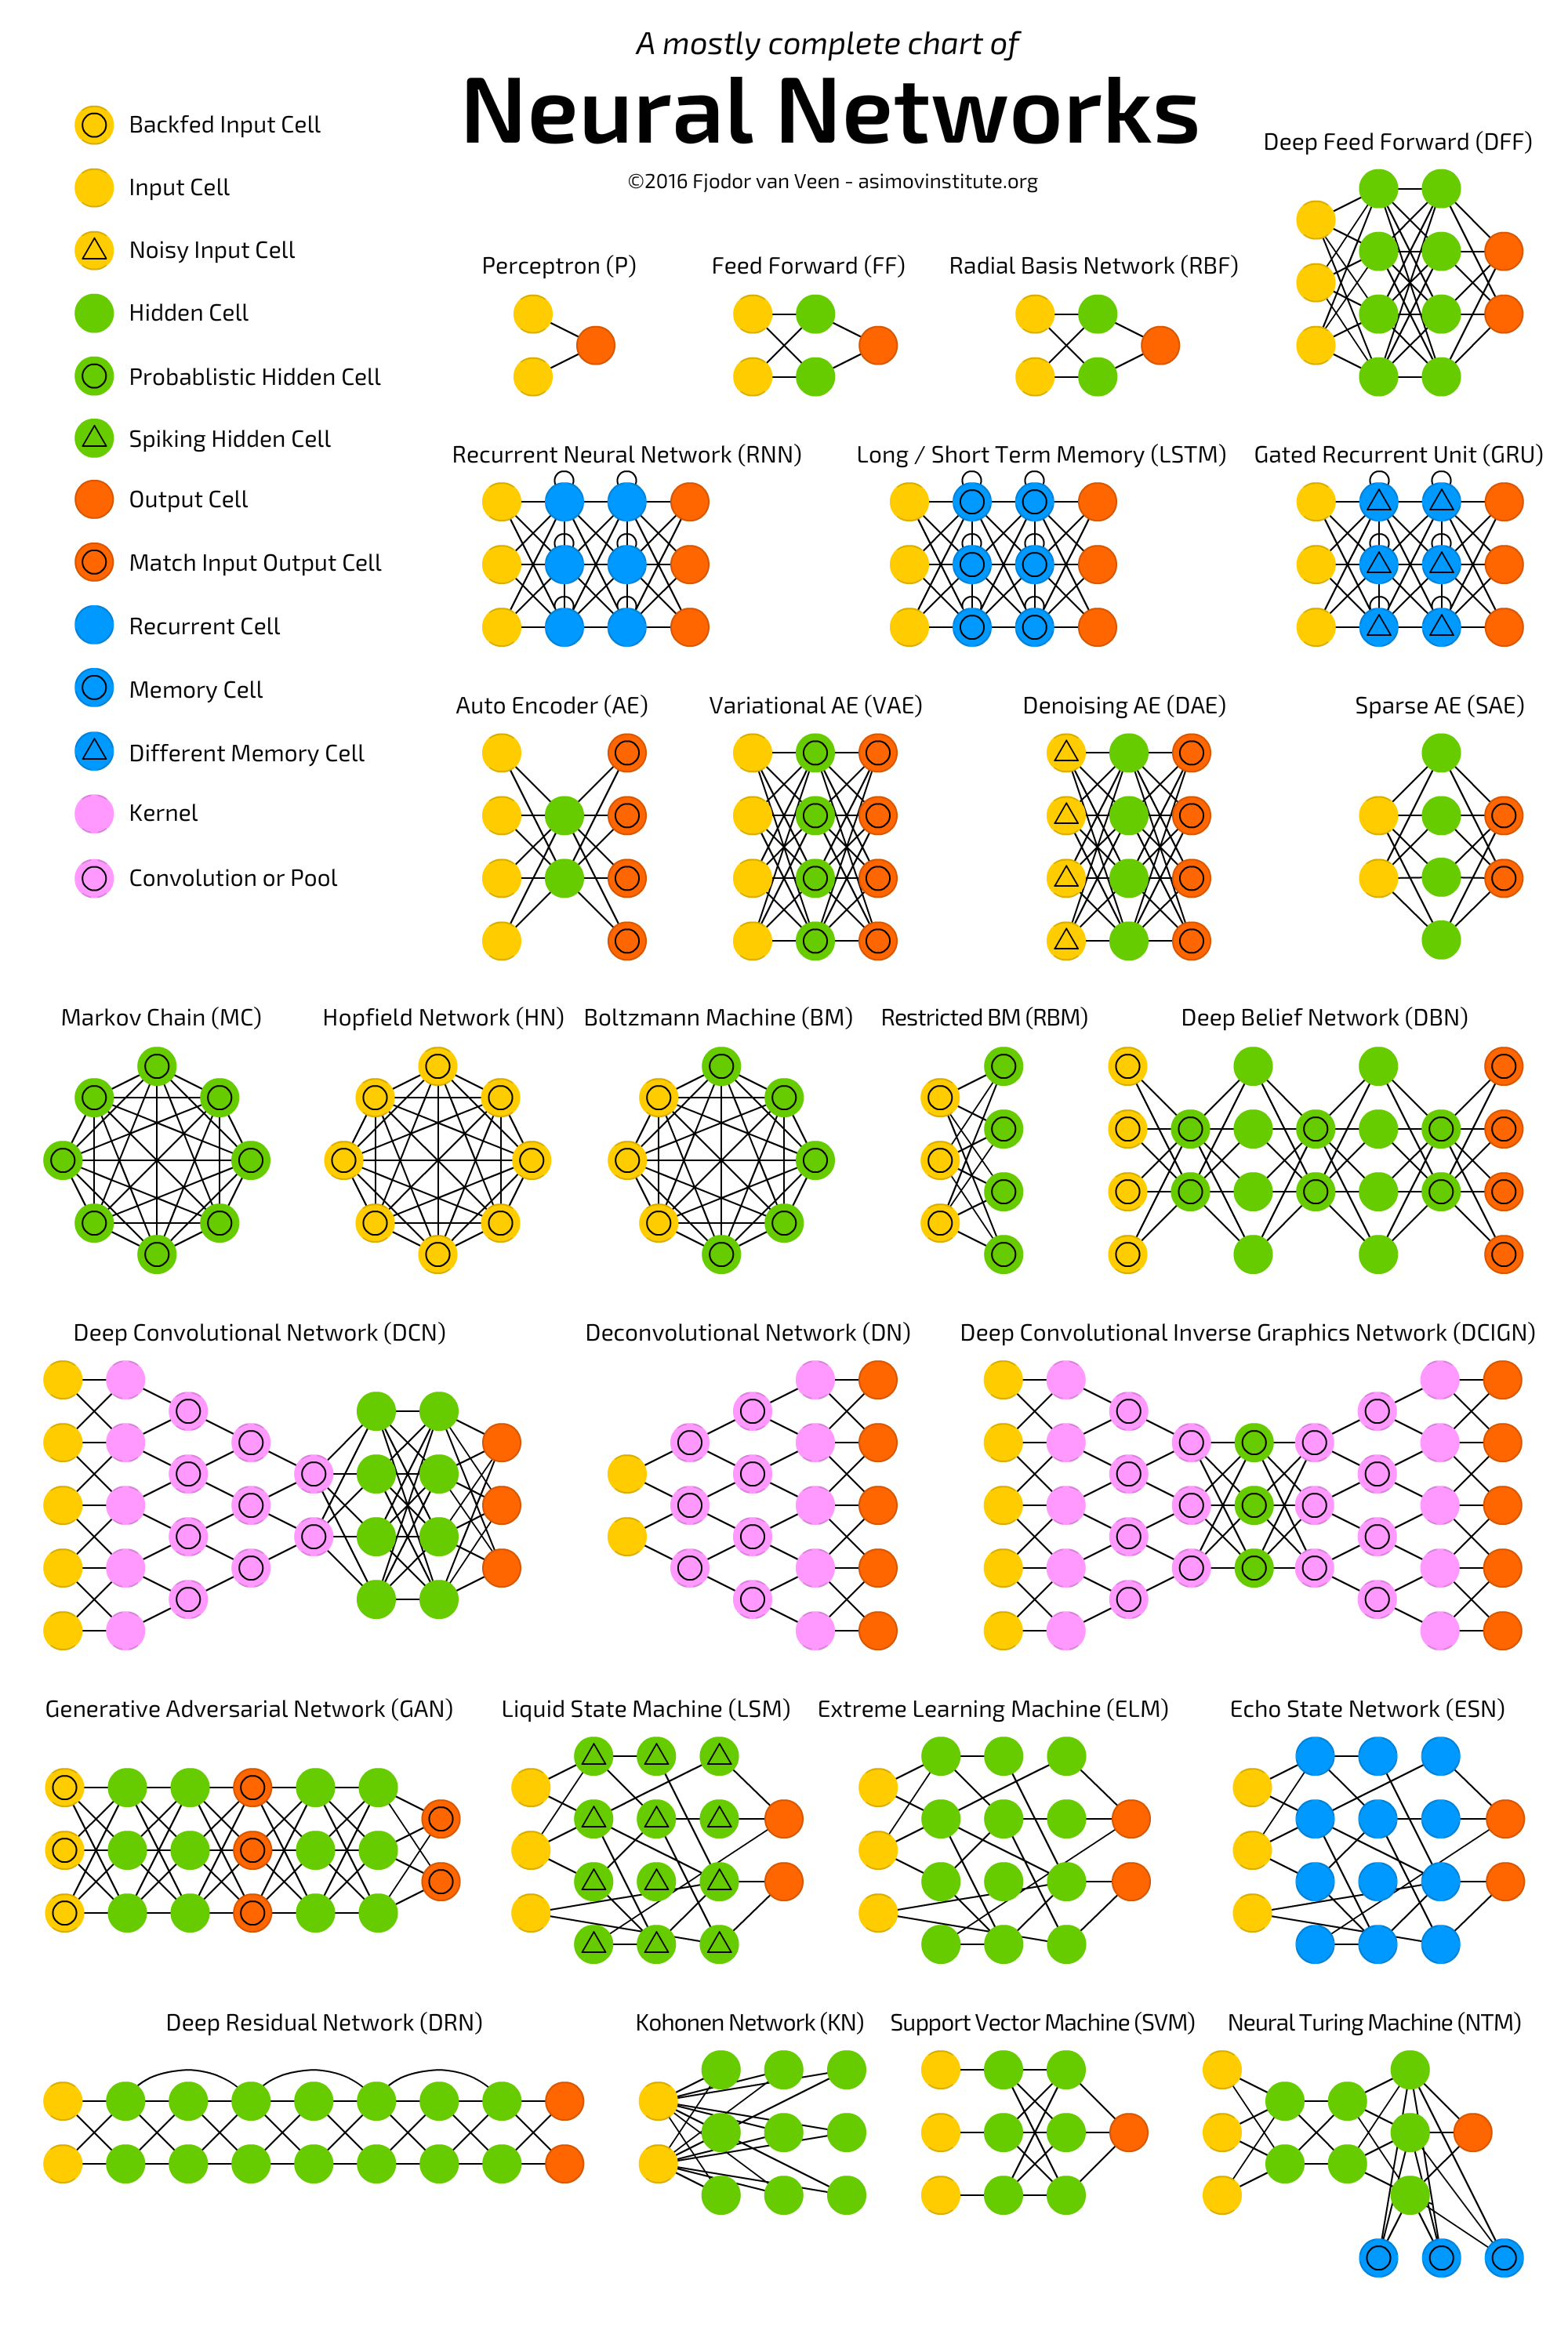

In [40]:
Image(filename='images/nnzoo.png', width=500)

## Applications
* Image recognition
* Encoding

# Q&A